In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
from scipy import stats

from matplotlib import cm

In [3]:
with open('Caseinformation_w_20210121.txt') as f:
    # Iterate through the file until the table starts
    for line in f:
        if line.startswith(''):
            break
    # Read the rest of the data, using spaces to split. 
    data = [r.split() for r in f]

In [5]:
data = np.array(data)
data = data.astype(np.float)

date = data[:,0]
Overpass = data[:,1]
wb_1st_00 = data[:,2]
wb_1st_00_center = data[:,3]
wb_1st_00_side = data[:,4]

wb_1st_01  = data[:,5]
wb_1st_05  = data[:,6]
wb_2nd_00 = data[:,7]
wb_2nd_01 = data[:,8]
wb_2nd_05 = data[:,9]
percent_cb = data[:,10]
wwml = data[:,11]
wwmax    = data[:,12]   
max_wskew  = data[:,13]         
wstar  = data[:,14]   
wspd_cb  = data[:,15] 
max_duration  = data[:,16] 
mean_duration  = data[:,17]     
num_cld   = data[:,18]   
num_cld_30  = data[:,19]
min_ww_percent  = data[:,20]  
LCL_mean_met  = data[:,21]     
Hcb_vceil = data[:,22]

In [6]:
ind = np.where((min_ww_percent > 80.) & (max_duration < 1800.) & (num_cld_30 >= 5))

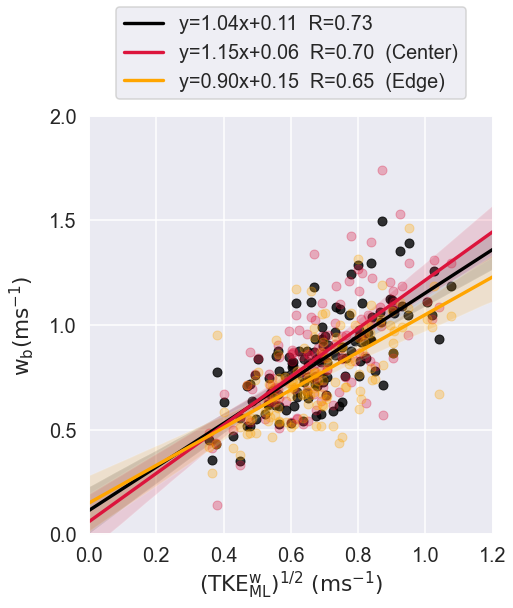

In [12]:
sns.set(context="talk", style="ticks", font_scale=1.2)
sns.set_style("darkgrid")

fig, axs = plt.subplots(1,1,figsize=[7, 7])

fig.tight_layout(w_pad=2., h_pad=2.5)
#observation
x = np.sqrt(0.5*wwml[ind])
y = wb_1st_00[ind]

axs.set_ylim((0., 2.))
axs.set_xlim((0., 1.2))

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}".format(slope,intercept,r_value), "color": "black"},
           scatter_kws={"color": "black"}, truncate=False)

#observation
x = np.sqrt(0.5*wwml[ind])
y = wb_1st_00_center[ind]

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (Center)".format(slope,intercept,r_value), "color": "crimson"},
           scatter_kws={"color": "crimson", 'alpha': 0.3}, truncate=False)

x = np.sqrt(0.5*wwml[ind])
y = wb_1st_00_side[ind]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (Edge)".format(slope,intercept,r_value), "color": "orange"},
           scatter_kws={"color": "orange", 'alpha': 0.3})

axs.legend(loc='center', bbox_to_anchor=(0.5, 1.15))


axs.set_xlabel(r"$\mathrm{(TKE^w_{ML})^{1/2} \ (ms^{-1})}$")
axs.set_ylabel(r"$\mathrm{w_b (ms^{-1})}$", labelpad=13)

axs.set_yticks(np.arange(0, 2.5, 0.5))

plt.show()